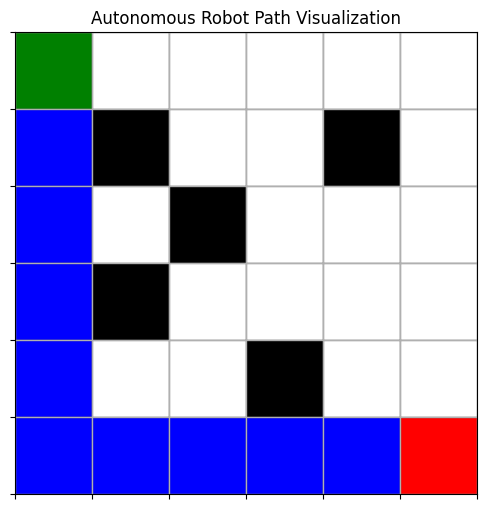

In [ ]:
import matplotlib.pyplot as plt
from collections import deque

# Grid size
ROWS, COLS = 6, 6

# Define obstacles
obstacles = {(1, 1), (2, 2), (3, 1), (4, 3), (1, 4)}

# Start and goal positions
start = (0, 0)
goal = (5, 5)

def is_valid(r, c):
    return 0 <= r < ROWS and 0 <= c < COLS and (r, c) not in obstacles

# Get valid neighbors
def get_neighbors(pos):
    r, c = pos
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    return [(r+dr, c+dc) for dr, dc in directions if is_valid(r+dr, c+dc)]

# Breadth-First Search (BFS)
def bfs(start, goal):
    queue = deque([start])
    visited = set([start])
    parent = {start: None}

    while queue:
        current = queue.popleft()
        if current == goal:
            break
        for neighbor in get_neighbors(current):
            if neighbor not in visited:
                visited.add(neighbor)
                parent[neighbor] = current
                queue.append(neighbor)

    # Reconstruct path
    path = []
    cur = goal
    while cur:
        path.append(cur)
        cur = parent.get(cur)
    return path[::-1] if path[-1] == start else []

# Compute path
path = bfs(start, goal)

# Visualization
def draw_grid(path):
    fig, ax = plt.subplots(figsize=(6, 6))
    for r in range(ROWS):
        for c in range(COLS):
            color = 'white'
            if (r, c) in obstacles:
                color = 'black'
            elif (r, c) == start:
                color = 'green'
            elif (r, c) == goal:
                color = 'red'
            elif (r, c) in path:
                color = 'blue'
            ax.add_patch(plt.Rectangle((c, ROWS - 1 - r), 1, 1, color=color, ec='gray'))

    ax.set_xlim(0, COLS)
    ax.set_ylim(0, ROWS)
    ax.set_xticks(range(COLS + 1))
    ax.set_yticks(range(ROWS + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)
    ax.set_aspect('equal')
    plt.title("Autonomous Robot Path Visualization")
    plt.show()

# Draw the result
draw_grid(path)